In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rcParams

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Dataset_preprocessed.csv')
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.601001e+06,20221031,전북도민일보,남형진 기자,"한국탄소산업진흥원, 탄소소부장 기업 기술 애로 지원 박차",IT_과학>과학,지역>대전,지역>충남,NaN,NaN,NaN,방윤혁,"신성,한국탄소산업진흥원,진흥원","소부장 융합혁신지원단,소부장혁신지원,대성중공업,우주항공,카텍에이치,진흥원","한국탄소산업진흥원,탄소소부장,기업,애로,지원,박차,한국탄소산업진흥원,원장,방윤혁,소...","진흥원,전문가,탄소소부장,소부장,한국탄소산업진흥원,자동차,수거장치,기술애,소부장혁신...",한국탄소산업진흥원(원장 방윤혁)이 국내 탄소 소재ㆍ부품ㆍ장비 기업의 현장 기술애로 ...,http://www.domin.co.kr/news/articleView.html?i...,NaN
1,7.100501e+06,20221031,전자신문,정다은,"[ET단상]자원순환, 포장재 '탈(脫) 플라스틱'에 달렸다",사회>환경,경제>유통,경제>자원,NaN,NaN,NaN,김지선,"한국,설령","환경부,FSC(산림관리협의회,자원,플라스틱,산업통상자원부,PCR","자원순환,포장재,플라스틱,플라스틱,인류,발명,최고,선물,최악,산물,유용성,편리,장점...","친환경,생활공작소,생활용품업계,재활용,포장재,배출량,폐기물,코로나19,순환경제,탄소...",플라스틱은 인류가 발명한 '최고의 선물이자 최악의 산물'이다. 가볍고 견고하다는 유...,http://www.etnews.com/20221031000039,NaN
2,2.100311e+06,20221031,서울경제,"유주희 기자,팀지구용 기자","해변의 불꽃놀이, '불법'입니다[지구용]",미분류,NaN,NaN,사회>사회갈등>시위,NaN,NaN,NaN,"지구,인천,저도,인천시,을왕리","시셰퍼드,CU,이마트24,의원실,해양수산부,세븐일레븐,GS25,국민의힘","해변,불꽃놀이,불법,지구용,해수욕장법,폭죽,판매,합법,단속,인력,어둠,해변,파도,소...","폭죽놀이,시셰퍼드,활동가,바닷가,불꽃놀이,지구용,활동가님,편의점,정철,폭죽놀,현수막...","어둠이 내려앉은 해변의 파도 소리, 손에는 맥주 한 캔, 속마음을 실어나르는 대화,...",http://www.sedaily.com/NewsView/26CKC2064U,NaN
3,2.100801e+06,20221028,아시아경제,영남취재본부 황두열,"부경대, 중학교 찾아 ‘청소년 해역인문학 강연’ 개최",지역>부산,지역>대전,IT_과학>IT_과학일반,NaN,NaN,NaN,"권영주,김학준,김찬희,문혜진,강호영","인문한국플러스,해역,해산,부산,해운대,영남","진로,KIOST,HK,HK+)사업단,정책연구원,HK+사업단,국립부경대학교,부흥중,부...","부경대,중학교,강연,청소년,해역,인문학,개최,국립,부경대학교,인문,한국플러스,HK,...","부경대,인문학,해양과학,부산,권영주,학생들,문혜진,hk,부산대,강호영,부흥중학교,김...",[아시아경제 영남취재본부 황두열 기자] 국립부경대학교 인문한국플러스(HK+)사업단이...,https://view.asiae.co.kr/article/2022102817342...,NaN
4,1.500701e+06,20221028,부산일보,김예빈,"부경대, 중학교 찾아 ‘청소년 해역인문학 강연’ 개최",지역>부산,IT_과학>IT_과학일반,지역>대전,NaN,NaN,NaN,"권영주,김학준,김찬희,문혜진,손동주,강호영","인문한국플러스,해역,HK+)사업단,해산,부산,해운대","진로,KIOST,정책연구원,HK+사업단,국립부경대학교,부흥중,부경대,부흥중학교,부산대","부경대,중학교,강연,청소년,해역,인문학,개최,24일,27일,부흥중,국립,부경대학교,...","인문학,부경대,부흥중,부산,문혜진,해양과학,권영주,부산대,hk,학생들,강호영,사업단...",국립부경대학교 인문한국플러스(HK+)사업단(단장 손동주)은 24일과 27일 양일간 ...,https://www.busan.com/view/busan/view.php?code...,NaN


In [11]:
df['연도']=0
for i in range(len(df)):
    df['연도'][i] = str(df['일자'][i])[:4]

In [15]:
a = df.groupby(['연도'])[['인물']].count()
a.columns = ['기사건수']
a.reset_index(inplace=True, drop=False)

a.loc[10] = ["2012",0]
a.loc[11] = ["2013", 0]

In [22]:
a.sort_values(by='연도', inplace=True)
a.reset_index(inplace=True, drop=True)

In [55]:
a = a[3:]
a.reset_index(inplace=True, drop=True)

In [56]:
a

,연도,기사건수
0,2014,2
1,2015,7
2,2016,17
3,2017,33
4,2018,173
5,2019,302
6,2020,241
7,2021,401
8,2022,318


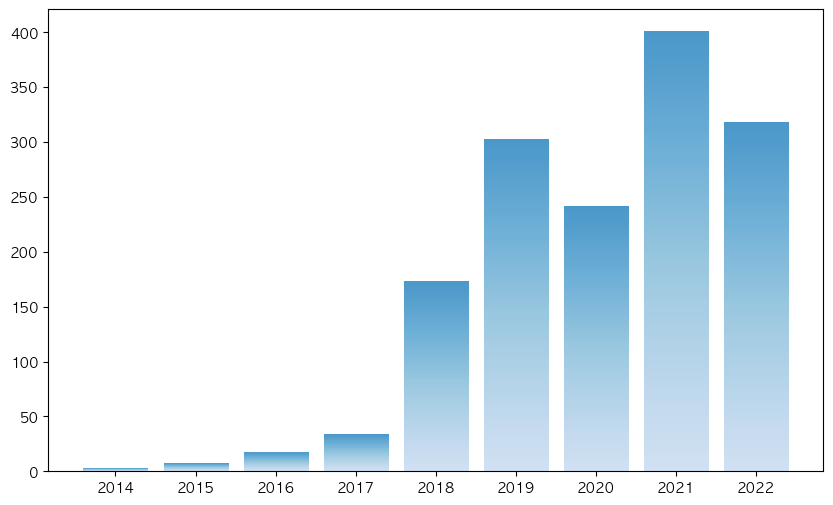

In [95]:
cmap = plt.get_cmap('Blues') ## 그라데이션 색상
def gradientbars(bars,cmap):
    grad = np.expand_dims(np.linspace(0,1,256),0).T ## 그라데이션을 적용할 컬러 값
    ax = bars[0].axes ## 막대기가 그려진 axes를 가져온다. 이 axes위에 그라데이션을 그린다.
    lim = ax.get_xlim()+ax.get_ylim() ## 처음 바 차트가 그려진 x좌표와 y좌표를 저장
    for bar in bars:
        bar.set_facecolor("none") #?# 막대기의 색상을 비워준다.
        x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
        w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
        ax.imshow(grad, extent=[x,x+w,y+h,y], cmap = cmap, aspect="auto",\
                   vmin=-0.5, vmax=2) ## 막대기안에 그라데이션을 그려준다.
        
    ax.axis(lim) ## 처음에 그린 바차트의 x좌표 한계값과 y좌표 한계값을 적용한다.
 

bars = plt.bar(a['연도'], a['기사건수'])
gradientbars(bars,cmap)
plt.show() 


(-0.8400000000000001, 8.84, 0.0, 421.05)

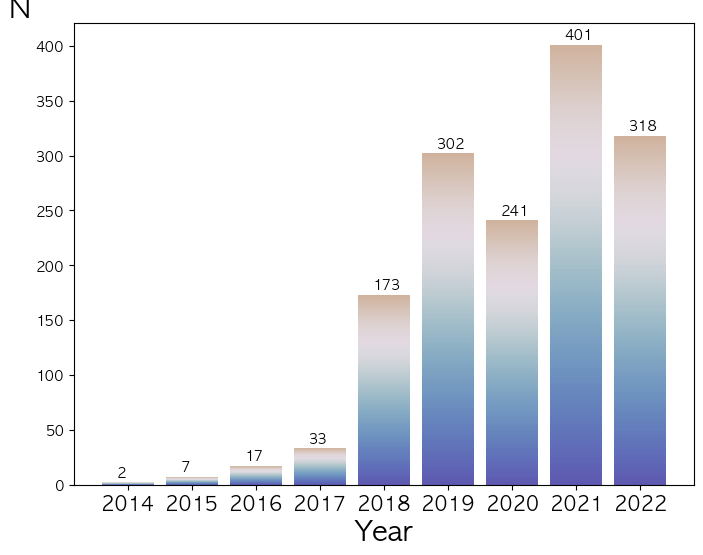

In [117]:
fig = plt.figure(figsize=(8,6))
bars = plt.bar(a['연도'], a['기사건수'])
cmap = plt.get_cmap('twilight_shifted')
grad = np.expand_dims(np.linspace(0,1,256),0).T ## 그라데이션을 적용할 컬러 값
ax = bars[0].axes ## 막대기가 그려진 axes를 가져온다. 이 axes위에 그라데이션을 그린다.
lim = ax.get_xlim()+ax.get_ylim()
plt.xticks(size=14)
plt.xlabel('Year', size=20)
plt.ylabel('N', size=20, rotation=0, loc='top')
for i, num in enumerate(a['기사건수']):
    plt.text(i-0.18, num+5, a['기사건수'][i], size=10)
for bar in bars:
        bar.set_facecolor("none") #?# 막대기의 색상을 비워준다.
        x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
        w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
        ax.imshow(grad, extent=[x,x+w,y+h,y], cmap = cmap, aspect="auto",\
                   vmin=-0.5, vmax=2) ## 막대기안에 그라데이션을 그려준다.
ax.axis(lim)

In [98]:
lim

(-0.8400000000000001, 8.84, 0.0, 421.05)

In [ ]:
for bar in bars:
        bar.set_facecolor("none") #?# 막대기의 색상을 비워준다.
        x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
        w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
        ax.imshow(grad, extent=[x,x+w,y+h,y], cmap = cmap, aspect="auto",\
                   vmin=-0.5, vmax=2)

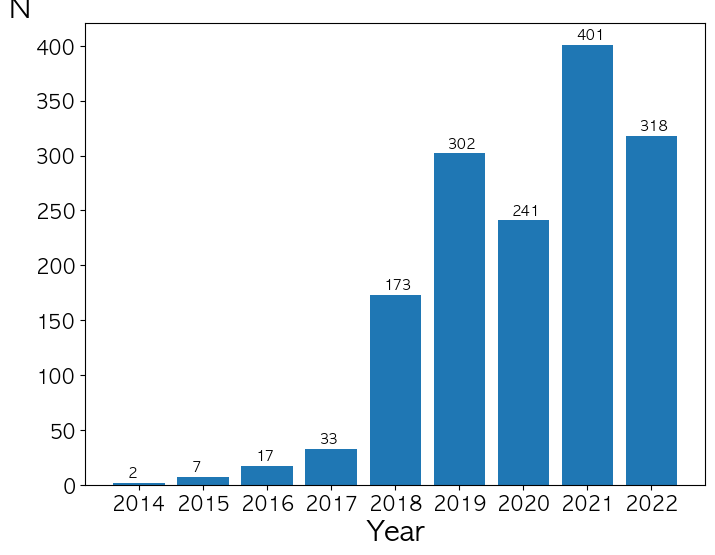

In [96]:
fig = plt.figure(figsize=(8,6))
y = [0,50,100,150,200,250,300,350,400]
plt.bar(a['연도'], a['기사건수'])
plt.xticks(size=14)
plt.yticks(y, size=14)
plt.xlabel('Year', size=20)
plt.ylabel('N', size=20, rotation=0, loc='top')
for i, num in enumerate(a['기사건수']):
    plt.text(i-0.18, num+5, a['기사건수'][i], size=10)
plt.show()